# Linear regression in PyTorch

Markus Enzweiler, markus.enzweiler@hs-esslingen.de

This is a demo used in a Computer Vision & Machine Learning lecture. Feel free to use and contribute.

## Setup

Adapt `packagePath` to point to the directory containing this notebeook.

In [16]:
# Imports
import sys
import os

In [17]:
# Additional imports

# Repository Root
repo_root = os.path.abspath(os.path.join("..", ".."))
# Add the repository root to the system path
sys.path.append(repo_root)

# Package Imports
from nbutils import requirements as nb_reqs
from nbutils import colab as nb_clab

In [18]:
# Package Path
package_path = "./" # local
print(f"Package path: {package_path}")

# Running on Colab?
on_colab = nb_clab.check_for_colab()

Package path: ./


In [19]:
# Install requirements in the current Jupyter kernel
req_file = os.path.join(package_path, "requirements.txt")
nb_reqs.pip_install_reqs(req_file)  

In [20]:
# Now we should be able to import the additional packages
import torch
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
torch.manual_seed(42);


## Linear regression

### Create some data based on adding noise to a known linear function

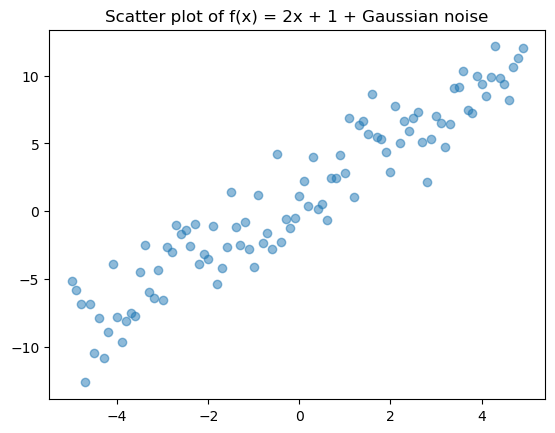

In [21]:
# Creating a function f(x) with a slope of 2 and bias of 1, e.g. f(x) = 2x + 1
# and added Gaussian noise

# True parameters
w_true = 2
b_true = 1
params_true = torch.tensor([w_true, b_true])

X = torch.arange(-5, 5, 0.1)
Y = w_true*X + b_true + 2 * torch.randn(X.shape)

# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")
plt.show()

### Linear model and loss

Our linear regression model is $ y = f(x) = w \cdot x + b$. We solve for $w$ and $b$ using gradient descent. 

In [22]:
def lin_model(params, x):
    w,b = params
    return w*x + b

We uses mean squared error loss between the predictions of our model and true values. 

In [23]:
def loss_fn(y_pred, y):   
    return torch.mean(torch.square(y - y_pred))

### Optimization via gradient descent

Initialize parameters $w$ and $b$ randomly.

In [24]:
params = 1e-2 * torch.randn(2, dtype=torch.float32)

# we track gradients for the parameters w and b
params.requires_grad_()

w,b = params
print(f"Initial weight : {w}")
print(f"Initial bias   : {b}")

Initial weight : -0.005671805702149868
Initial bias   : -0.005706474184989929


Optimize via gradient descent

In [25]:
# Hyperparameters
num_iters = 10000
learning_rate = 3e-4

# Loop over the number of iterations
for it in range(num_iters):

    # predict y from x
    Y_pred = lin_model(params, X)

    # Compute the loss
    loss = loss_fn(Y_pred, Y)

    # Gradient of loss function w.r.t parameters
    loss.backward()
  
    # update parameters via gradient descent update rules
    with torch.no_grad():
        params -= learning_rate * params.grad
        params.grad.zero_()
  
    # Give some status output once in a while
    if it % 500 == 0 or it == num_iters - 1:
        w,b = params  
        error_norm = torch.sum(torch.square(params - params_true)) ** 0.5
        print(f"Iteration {it:5d} | Loss {loss.item():>10.5f} | " 
              f"w {w.item():> 8.5f} | b {b.item():> 8.5f} | Error norm {error_norm.item():>.5f}")
    
w,b = params    
print(f"Final weight after optimization : {w.item():.5f} (true: {w_true})")
print(f"Final bias after optimization   : {b.item():.5f} (true: {b_true})")       

Iteration     0 | Loss   38.02457 | w  0.00427 | b -0.00509 | Error norm 2.23454
Iteration   500 | Loss    4.78088 | w  1.82125 | b  0.27735 | Error norm 0.74443
Iteration  1000 | Loss    4.24315 | w  1.97070 | b  0.49474 | Error norm 0.50611
Iteration  1500 | Loss    4.06571 | w  1.98387 | b  0.65645 | Error norm 0.34392
Iteration  2000 | Loss    3.96911 | w  1.98567 | b  0.77631 | Error norm 0.22415


Iteration  2500 | Loss    3.91610 | w  1.98635 | b  0.86511 | Error norm 0.13558
Iteration  3000 | Loss    3.88700 | w  1.98681 | b  0.93089 | Error norm 0.07035
Iteration  3500 | Loss    3.87104 | w  1.98714 | b  0.97963 | Error norm 0.02409
Iteration  4000 | Loss    3.86227 | w  1.98739 | b  1.01573 | Error norm 0.02016
Iteration  4500 | Loss    3.85746 | w  1.98757 | b  1.04248 | Error norm 0.04426
Iteration  5000 | Loss    3.85482 | w  1.98770 | b  1.06230 | Error norm 0.06350
Iteration  5500 | Loss    3.85337 | w  1.98780 | b  1.07698 | Error norm 0.07794
Iteration  6000 | Loss    3.85258 | w  1.98787 | b  1.08785 | Error norm 0.08868
Iteration  6500 | Loss    3.85214 | w  1.98793 | b  1.09591 | Error norm 0.09666
Iteration  7000 | Loss    3.85190 | w  1.98798 | b  1.10187 | Error norm 0.10258
Iteration  7500 | Loss    3.85177 | w  1.98800 | b  1.10630 | Error norm 0.10697
Iteration  8000 | Loss    3.85170 | w  1.98802 | b  1.10957 | Error norm 0.11022
Iteration  8500 | Loss    3.

Visualize linear fit

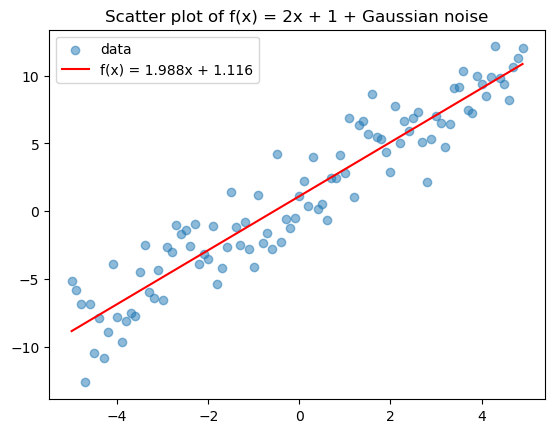

In [26]:
# Visualize
plt.scatter(X, Y, alpha=0.5)
plt.title("Scatter plot of f(x) = 2x + 1 + Gaussian noise")

# Plot the recovered line
Y_model = lin_model(params, X)
plt.plot(X.tolist(), Y_model.tolist(), color='red')

plt.legend(["data", f"f(x) = {w.item():.3f}x + {b.item():.3f}"])
plt.show()